## Exploration of exlcusion criterion: 

Previously our exclusion criterion was as follows: 
We calculated the SD of participants' estimates for each subcondition for the bisection task. A subcondition was considered excluded if the SD was greater than 0.2. If a participant had five or more excluded subconditions, they were replaced. 

Following diussions with Ron and Maddison we have decided to develop a new exclusion criterion. 
Aims:
1. Find what other studies have been using for exclusions. 
2. Look at the distribution of variance
3. Look at how variances change through trials/subconditions. Generally, they should converge to a stable value.

In [1]:
import numpy as np
import pandas as pd 


paths = [];
path = '/Users/akshdeepsandhu/Desktop/UBC/Correlation/Gamma/' 
for i in range(1,5):
    value = path + str(i)+'.xlsm'
    paths.append(value)
#generate file paths for excel sheets


Gamma1_sheet = pd.ExcelFile(paths[0])
Gamma2_sheet = pd.ExcelFile(paths[1])
Gamma3_sheet = pd.ExcelFile(paths[2])
Gamma4_sheet = pd.ExcelFile(paths[3])

    

Created a Pandas dataframe for each gamma conditon. 



In [2]:
G1_exclusions = Gamma1_sheet.parse('1. Exclusions')
G2_exclusions = Gamma2_sheet.parse('1. Exclusions')
G3_exclusions = Gamma3_sheet.parse('1. Exclusions')
G4_exlcusions = Gamma4_sheet.parse('1. Exclusions')


G1 = G1_exclusions.loc[22:,["subCondition","estimatedMid"]]
G2 = G2_exclusions.loc[22:,["subCondition","estimatedMid"]]
G3 = G3_exclusions.loc[22:,["subCondition","estimatedMid"]]
G4 = G4_exlcusions.loc[22:,["subCondition","estimatedMid"]]


Created a dataframe for exlcusions sheet.<br>
Created a dataframe for estimated midpoints relative to the subcondition.

In [3]:
sub_conds = np.zeros(shape=[16,80])
'''15 subconditons, 80 values for each (20 participants x 4 trials)'''

for i in range(1,16):
    sub_cond = G4.loc[G4['subCondition'] == i] #Note, change G1 to G2,G3.. etc  to correspond to Gamma condition
    sub_cond_np = np.array(sub_cond)
    sub_cond_np_del = np.delete(sub_cond_np, 0,1)
    sub_cond_np_T = sub_cond_np_del.T
    sub_conds[i] = sub_cond_np_T



sub_conds is a 16x80 numpy array. Each index in the array corresponds to a subcondtion (e.g.  ```sub_conds[2]``` would be subcondition 2). Each index contains all the estimated midpoints for the respective subconditon, hence all the particpant data for that subcondtion. This was done in order to visulaize the distribution of the estimated midpoints.<br>***Note:  ```sub_conds[0]``` contains all zeros to make indexing more intuative ***

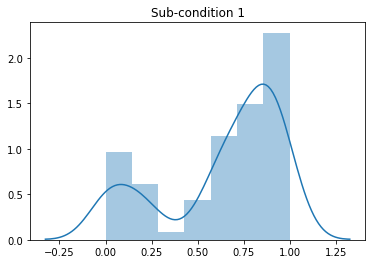

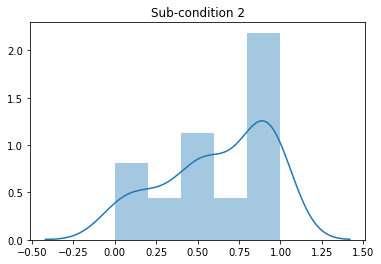

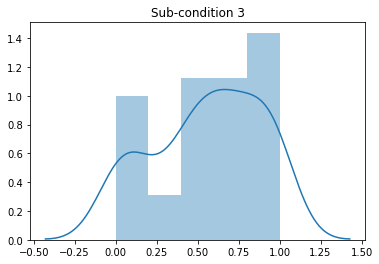

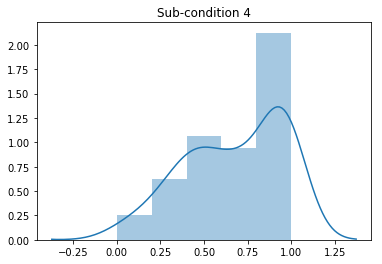

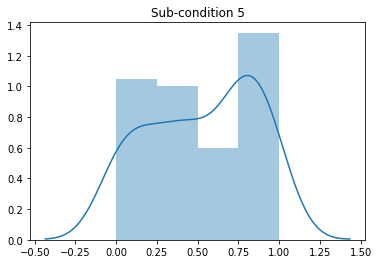

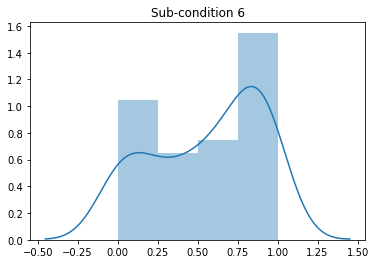

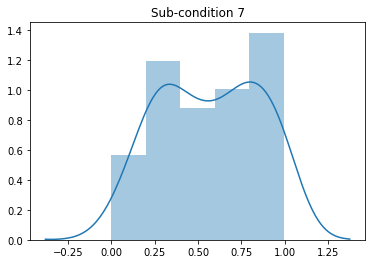

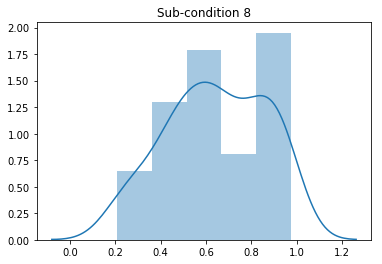

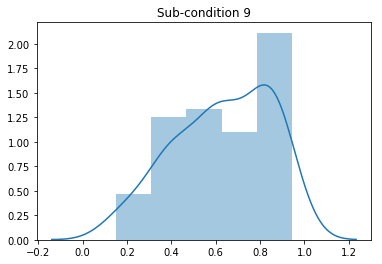

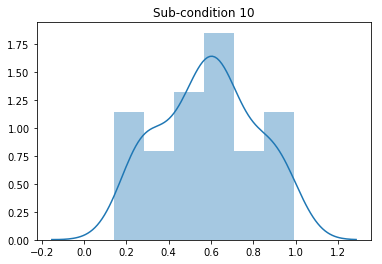

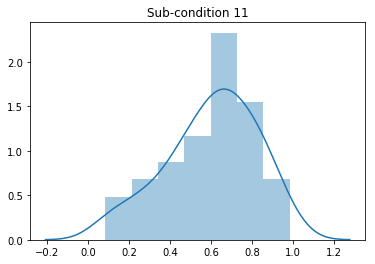

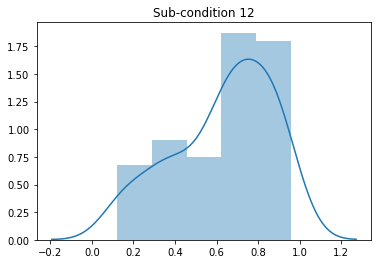

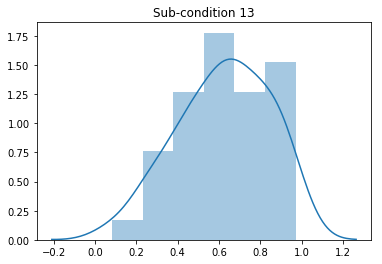

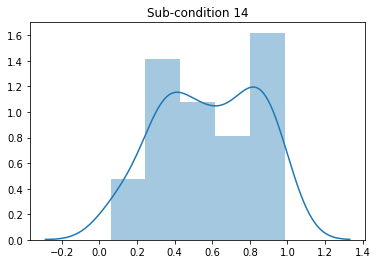

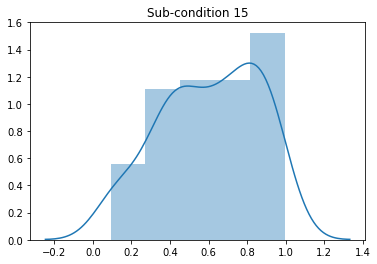

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.backends.backend_pdf 
import seaborn as sns


for i in range(1,16):
    cond = sns.distplot(sub_conds[i])
    plt.title("Sub-condition " + str(i))
    cond.figure.savefig("Sub-condition" + str(i) + ".png") 
    plt.show()



For a given Gamma condition, histograms of the mid-point estimates for each sub-condition were plotted. This exercise in visualzation aimed to show that most Gamma conditons follow a bi-modal distribution for the first few sub-condtions, but towards the later sub-conditions the participant estimates tend to converge towards a uni-modal distribution.
Next we calculate the variance for each participant estimate, for each sub-condition.